<a href="https://colab.research.google.com/github/desaiankitb/pytorch-basics/blob/main/deep-learning-blitz/03_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Training a Classifier
This is it. You have seen how to define neural networks, compute loss and make updates to the weights of the network. 

Now you might be thinking, 

## What about data?

Generally, when you have to deal with image, text, audio, or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`. 
  - For images, packages such as Pillow, OpenCV are useful. 
  - For audio, packages such as scipy and librosa 
  - For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful 

Specifically for vision, we have created a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code. 

For this notebook, we will use CIFAR10 dataset. It has classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frong', 'horse', 'ship', 'truck'. The images in CIFAR-10 are of size 32x32, i.e. 3-channel color images of 32x32 pixel in size. 
![image](https://pytorch.org/tutorials/_images/cifar10.png)
cifar10

### Training an image classifier 

We will do the following steps in order: 

1. Load and normalize the CIFAR10 training and test datasets using `torchvision` 
2. Define a Convolutional Neural Network 
3. Define a loss function 
4. Train the network on the training data 
5. Test the network on the test data 

### 1. Load and normalize CIFAR10

Using `torchvision`, it is extremely easy to load CIFAR10. 


In [1]:
import torch
import torchvision 
import torchvision.transforms as transforms 

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

> **Note:** If running on Windows and you get a `BrokenPipeError`, try setting the `num_worker` of `torch.utils.data.DataLoader()` to 0. 

In [6]:
transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )
    ]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun. 

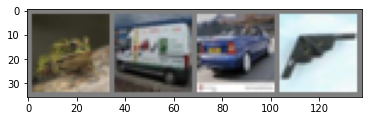

 frog truck   car plane


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image 

def imshow(img):
  img = img / 2 + 0.5 # unnormalize 
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images 
imshow(torchvision.utils.make_grid(images))
# print labels 
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Run the above snippt multiple times to see different images in the dataset. 